<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/DL_Project/YOLO_data_gene_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# train

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/DLP/YOLO_train_data2.csv")
tlist = df['fname'].values.tolist()
tlist[:5], len(tlist)

(['C24_B02_004_753149',
  'C24_B02_006_753180',
  'C24_B02_004_753163',
  'C24_B02_006_753173',
  'C24_B02_004_753184'],
 3220)

In [ ]:
def get_crop_points(annotations, width, height):
    pts_x=[]; pts_y=[];
    for annot in annotations:
        pts_x.append(annot['segmentation'][0])
        pts_x.append(annot['segmentation'][4])
        pts_y.append(annot['segmentation'][1])
        pts_y.append(annot['segmentation'][5])

    l = int(min(pts_x)) - 120
    if l < 0: l = 0
    r = int(max(pts_x)) + 120
    if r > width: r = int(width)
    t = int(min(pts_y)) - 120
    if t < 0: t = 0
    b = int(max(pts_y)) + 120
    if b > height: b = int(height)

    return l, t, r, b

In [ ]:
import os
import json

def get_info(json_dir, fname):
    with open(os.path.join(json_dir, fname+".json")) as f:
        data = json.load(f)

    iw = float(data['images'].get('width'))
    ih = float(data['images'].get('height'))
    annotations = data['annotations']
    categories = data['categories']

    return iw, ih, annotations, categories

In [ ]:
category = ['잎', '줄기', '화방', '과실']

# YOLO bbox 형식 : class x_center y_center width height
def get_bbox_text(annotations, categories, adjust_L, adjust_T, crop_width, crop_height):
    labels = []
    for anno, cate in zip(annotations, categories):
        class_ = category.index(cate['name'])
        left_shift = anno['bbox'][0] - adjust_L
        top_shift = anno['bbox'][1] - adjust_T
        x_center = round((left_shift + anno['bbox'][2]/2) / crop_width, 10)
        y_center = round((top_shift + anno['bbox'][3]/2) / crop_height, 10)
        width = round(anno['bbox'][2] / crop_width, 10)
        height = round(anno['bbox'][3] / crop_height, 10)
        label_info = f"{class_} {x_center} {y_center} {width} {height}"
        labels.append(label_info)

    return labels

In [ ]:
def save_bbox_text(save_dir, fname, txt_labels):
    with open(os.path.join(save_dir, fname + ".txt"), 'w') as f:
        for i, label in enumerate(txt_labels):
            if i+1 == len(txt_labels):
                f.write(label)
            else:
                f.write(label + '\n')

In [ ]:
json_dir = "/content/drive/MyDrive/DLP/label_data_json/extracted_train/"

img_width, img_height, annotations, categories = get_info(json_dir, tlist[0])
img_width, img_height, annotations, categories

(1094.0,
 1480.0,
 [{'segmentation': [227.02,
    638.54,
    274.49,
    638.54,
    274.49,
    692.63,
    227.02,
    692.63],
   'area': 2567.65,
   'bbox': [227.02, 638.54, 47.47, 54.09],
   'isCrowd': 0,
   'id': 0,
   'image_id': 753149,
   'category_id': 0},
  {'segmentation': [281.31,
    593.09,
    325.12,
    593.09,
    325.12,
    636.91,
    281.31,
    636.91],
   'area': 1919.75,
   'bbox': [281.31, 593.09, 43.81, 43.82],
   'isCrowd': 0,
   'id': 1,
   'image_id': 753149,
   'category_id': 1},
  {'segmentation': [336.15,
    587.55,
    410.76,
    587.55,
    410.76,
    662.7,
    336.15,
    662.7],
   'area': 5606.94,
   'bbox': [336.15, 587.55, 74.61, 75.15],
   'isCrowd': 0,
   'id': 2,
   'image_id': 753149,
   'category_id': 2},
  {'segmentation': [376.59,
    626.35,
    465.6,
    626.35,
    465.6,
    717.01,
    376.59,
    717.01],
   'area': 8070.55,
   'bbox': [376.59, 626.35, 89.02, 90.66],
   'isCrowd': 0,
   'id': 3,
   'image_id': 753149,
   'cate

In [ ]:
cl, ct, cr, cb = get_crop_points(annotations, img_width, img_height)
cl, ct, cr, cb #--> crop : left, top, right, bottom

(107, 398, 797, 993)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/strawberry/train/images/"

img = cv2.imread(image_dir+tlist[0]+".jpg")
crop_img = img[ct:cb, cl:cr].copy()
crop_h, crop_w = crop_img.shape[:2]
crop_h, crop_w

(595, 690)

In [ ]:
txt_labels = get_bbox_text(annotations, categories, cl, ct, crop_w, crop_h)
txt_labels

['2 0.2083405797 0.4497226891 0.0687971014 0.090907563',
 '2 0.2843695652 0.3647058824 0.0634927536 0.0736470588',
 '2 0.3861666667 0.3817226891 0.1081304348 0.126302521',
 '3 0.4552173913 0.4599663866 0.1290144928 0.1523697479',
 '3 0.4427753623 0.5409915966 0.1057246377 0.0722689076',
 '3 0.376942029 0.5568403361 0.1153623188 0.1952268908',
 '1 0.7627173913 0.3486470588 0.1274057971 0.2483193277',
 '0 0.2998623188 0.2778655462 0.1378405797 0.0881008403',
 '1 0.5099130435 0.2492184874 0.0935072464 0.0922857143',
 '1 0.6719927536 0.5421680672 0.0551449275 0.5124033613']

In [ ]:
save_dir = "/content/drive/MyDrive/DLP"

save_bbox_text(save_dir, tlist[0], txt_labels)

In [ ]:
eng_class = {
    '잎':'leaf',
    '줄기':'stem',
    '화방':'flower',
    '과실':'fruit'
}
def draw_bboxes(img, annotations, categories):
    for anno, cate in zip(annotations, categories):
        rect = [int(round(x)) for x in anno['bbox']]
        cv2.rectangle(img, rec=rect, color=(0,0,255), thickness=2)
        text = eng_class[cate['name']]
        cv2.putText(
            img, text, org=(rect[0], rect[1]-5),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.,
            color=(255,0,0), thickness=2, lineType=cv2.LINE_AA
        )
    # cv2_imshow(img)

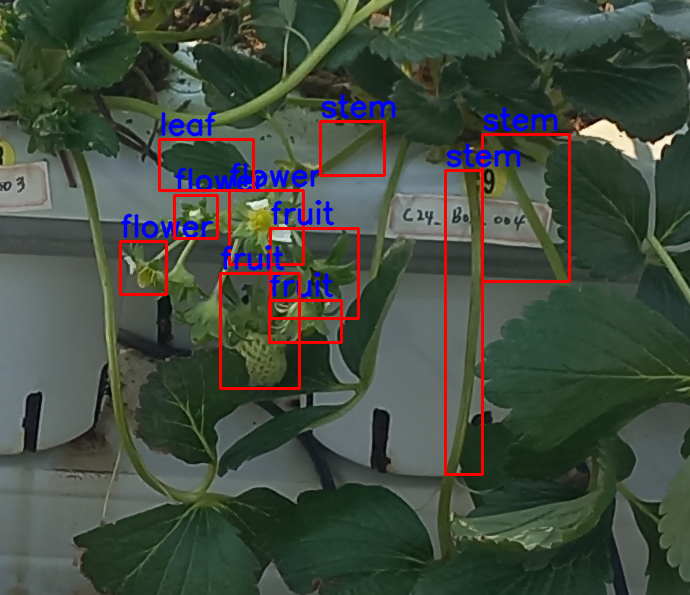

In [ ]:
draw_bboxes(img, annotations, categories)
test_img = img[ct:cb, cl:cr].copy()
cv2_imshow(test_img)

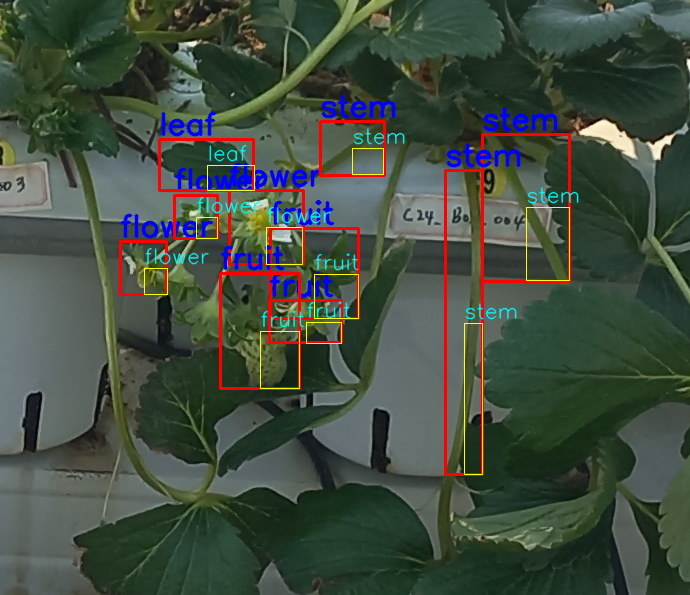

In [ ]:
for label in txt_labels:
    info = list(map(float, label.split()))
    cx = int(round(info[1] * crop_w))
    cy = int(round(info[2] * crop_h))
    hw = int(round(info[3] * crop_w / 2))
    hh = int(round(info[4] * crop_h / 2))
    cv2.rectangle(test_img, rec=(cx, cy, hw, hh), color=(0,255,255), thickness=1)
    cv2.putText(
        test_img,
        text=eng_class[category[int(info[0])]], org=(cx, cy-5),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7,
        color=(255,255,0), thickness=1, lineType=cv2.LINE_AA
    )
cv2_imshow(test_img)

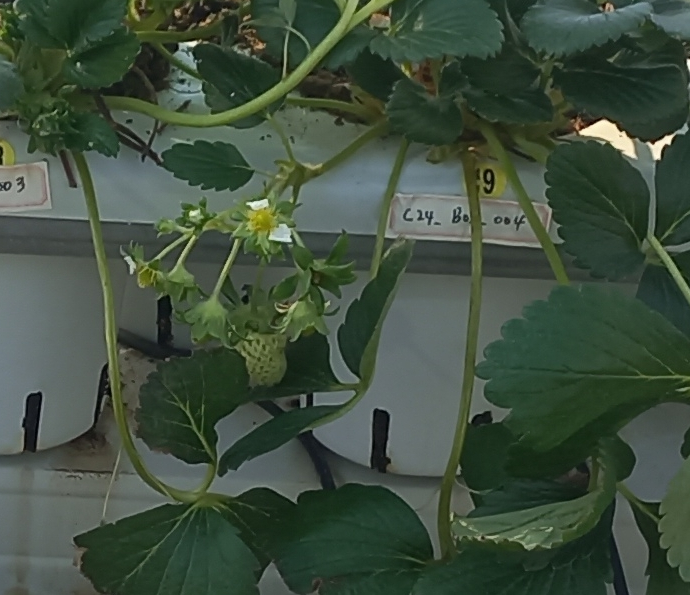

In [ ]:
cv2_imshow(crop_img)

In [ ]:
cv2.imwrite("/content/drive/MyDrive/DLP/"+tlist[0]+".jpg", crop_img)

<br></br>

---

In [ ]:
json_dir = "/content/drive/MyDrive/DLP/label_data_json/extracted_train/"
image_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/strawberry/train/images/"
save_img_dir = "/content/drive/MyDrive/DLP/YOLO_data/train/images/"
save_txt_dir = "/content/drive/MyDrive/DLP/YOLO_data/train/labels/"

In [ ]:
from tqdm.notebook import tqdm

for fname in tqdm(tlist, desc="Processing"):
    img_width, img_height, annotations, categories = get_info(json_dir, fname)
    cl, ct, cr, cb = get_crop_points(annotations, img_width, img_height)

    img = cv2.imread(image_dir+fname+".jpg")
    crop_img = img[ct:cb, cl:cr]
    if not cv2.imwrite(save_img_dir+fname+".jpg", crop_img):
        print("Image Save Fail! -->", fname)
        break
    crop_h, crop_w = crop_img.shape[:2]

    txt_labels = get_bbox_text(annotations, categories, cl, ct, crop_w, crop_h)
    save_bbox_text(save_txt_dir, fname, txt_labels)

Processing:   0%|          | 0/3220 [00:00<?, ?it/s]

In [ ]:
img_list = os.listdir("/content/drive/MyDrive/DLP/YOLO_data/train/images")
txt_list = os.listdir("/content/drive/MyDrive/DLP/YOLO_data/train/labels")
len(img_list), len(txt_list)

(3220, 3220)

In [ ]:
img_list = [x.split('.')[0] for x in img_list]
for v in txt_list:
    if v.split('.')[0] not in img_list:
        print(v)

<br></br>

# valid

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DLP/YOLO_valid_data2.csv")
vlist = df['fname'].values.tolist()
vlist[:5], len(vlist)

(['C24_B02_005_458854',
  'C24_B02_005_459344',
  'C24_B02_005_459516',
  'C24_B02_005_459875',
  'C24_B02_005_482476'],
 400)

In [ ]:
json_dir = "/content/drive/MyDrive/DLP/label_data_json/extracted_valid/"
image_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/strawberry/valid/images/"
save_img_dir = "/content/drive/MyDrive/DLP/YOLO_data/valid/images/"
save_txt_dir = "/content/drive/MyDrive/DLP/YOLO_data/valid/labels/"

In [ ]:
import cv2
from tqdm.notebook import tqdm

for fname in tqdm(vlist, desc="Processing"):
    img_width, img_height, annotations, categories = get_info(json_dir, fname)
    cl, ct, cr, cb = get_crop_points(annotations, img_width, img_height)

    img = cv2.imread(image_dir+fname+".jpg")
    crop_img = img[ct:cb, cl:cr]
    if not cv2.imwrite(save_img_dir+fname+".jpg", crop_img):
        print("Image Save Fail! -->", fname)
        break
    crop_h, crop_w = crop_img.shape[:2]

    txt_labels = get_bbox_text(annotations, categories, cl, ct, crop_w, crop_h)
    save_bbox_text(save_txt_dir, fname, txt_labels)

Processing:   0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
img_list = os.listdir("/content/drive/MyDrive/DLP/YOLO_data/valid/images")
txt_list = os.listdir("/content/drive/MyDrive/DLP/YOLO_data/valid/labels")
len(img_list), len(txt_list)

(400, 400)

In [ ]:
img_list = [x.split('.')[0] for x in img_list]
for v in txt_list:
    if v.split('.')[0] not in img_list:
        print(v)

<br></br>

# test

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DLP/test_weights_data.csv")
tslist = df['fname'].values.tolist()
tslist[:5], len(tslist)

(['C24_B02_005_507981',
  'C24_B02_005_573845',
  'C24_B02_005_594654',
  'C24_B02_005_606180',
  'C24_B02_005_606192'],
 76)

In [ ]:
json_dir = "/content/drive/MyDrive/DLP/label_data_json/extracted_valid/"
image_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/strawberry/valid/images/"
save_img_dir = "/content/drive/MyDrive/DLP/YOLO_data/test/images/"
save_txt_dir = "/content/drive/MyDrive/DLP/YOLO_data/test/labels/"

In [ ]:
import cv2
from tqdm.notebook import tqdm

# crop image
for fname in tqdm(tslist, desc="Processing"):
    img_width, img_height, annotations, categories = get_info(json_dir, fname)
    cl, ct, cr, cb = get_crop_points(annotations, img_width, img_height)

    img = cv2.imread(image_dir+fname+".jpg")
    crop_img = img[ct:cb, cl:cr]
    if not cv2.imwrite(save_img_dir+fname+".jpg", crop_img):
        print("Image Save Fail! -->", fname)
        break
    crop_h, crop_w = crop_img.shape[:2]

    txt_labels = get_bbox_text(annotations, categories, cl, ct, crop_w, crop_h)
    save_bbox_text(save_txt_dir, fname, txt_labels)

Processing:   0%|          | 0/76 [00:00<?, ?it/s]

In [ ]:
import shutil
from tqdm.notebook import tqdm

json_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/strawberry/valid/labels"

# origial image
for fname in tqdm(tslist, desc='Processing'):
    # images
    src = os.path.join(image_dir, fname+'.jpg')
    dst = os.path.join(save_img_dir, fname+'.jpg')
    shutil.copyfile(src, dst)

    # labels
    src = os.path.join(json_dir, fname+'.txt')
    dst = os.path.join(save_txt_dir, fname+'.txt')
    shutil.copyfile(src, dst)

Processing:   0%|          | 0/76 [00:00<?, ?it/s]

In [ ]:
img_list = os.listdir("/content/drive/MyDrive/DLP/YOLO_data/test/images")
txt_list = os.listdir("/content/drive/MyDrive/DLP/YOLO_data/test/labels")
len(img_list), len(txt_list)

(76, 76)

In [ ]:
img_list = [x.split('.')[0] for x in img_list]
for v in txt_list:
    if v.split('.')[0] not in img_list:
        print(v)